In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm;

%matplotlib inline

folder='C:/Users/Raskolnikov/Downloads/DAN-P6-donnees/DAN-P6-donnees/'

df_customers = pd.read_csv(folder+'customers.csv')
df_products = pd.read_csv(folder+'products.csv')
df_transactions = pd.read_csv(folder+'transactions.csv')

df_all=pd.merge(df_transactions,df_products,how='left', on='id_prod')
df_all=pd.merge(df_all,df_customers,how='left', on='client_id')

df_all.drop(df_all[df_all.date.str.contains('^test')].index,inplace=True)

df_all['date'] = pd.to_datetime(df_all['date'])

df_all['age'] = df_all['birth'].apply(lambda x:2022-x)



df_all['month'] = df_all['date'].dt.strftime('%Y-%m')

df_all.dropna(inplace=True)

df_all_by_customer=df_all.groupby('client_id').agg(
    sex=('sex', np.max),
    age=('age', np.max),
    amount=('price', np.sum),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_customer.sort_values(by='amount',ascending=False,inplace=True)
#df_all_by_customer['amount']=df_all_by_customer['amount'].apply(lambda x : "{:,.2f}".format(x))
sex={'f':0,'m':1}
df_all_by_customer['sex']=df_all_by_customer['sex'].apply(lambda x:sex.get(x,''))

df_all[['0','1','2']]=pd.get_dummies(df_all['categ'])
df_all[['m','f']]=pd.get_dummies(df_all['sex'])
df_all_by_month=df_all.groupby('month').agg(
    age=('age', np.mean),
    m=('m', np.count_nonzero),
    f=('f', np.count_nonzero),
    amount=('price', np.sum),
    avg_price=('price', np.mean),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_month.sort_values(by='month',ascending=True,inplace=True)
df_all_by_month['amount']=df_all_by_month['amount'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['avg_price']=df_all_by_month['avg_price'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['age']=df_all_by_month['age'].apply(lambda x : "{:,.1f}".format(x))

KeyError: "Column(s) ['0', '1', '2'] do not exist"

In [ ]:
df_all

In [4]:
df_all.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,34,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,54,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,22,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,42,2023-01


In [3]:
#computstat
import statsmodels.api as sm
df_all['intercept']=1
lm=sm.OLS(df_all['price'],df_all[['age','intercept']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                 3.116e+04
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:44:59   Log-Likelihood:            -2.9236e+06
No. Observations:              679111   AIC:                         5.847e+06
Df Residuals:                  679109   BIC:                         5.847e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.2828      0.002   -176.532      0.000      -0.286      -0.280
intercept     29.9519      0.074    404.439      0.000      29.807      30.097
==============================================================================
Omnibus:                   697271.395   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51535037.451
Skew:                           5.115   Prob(JB):                         0.00
Kurtosis:                      44.432   Cond. No.                         157.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
from scipy import stats
stats.shapiro(results.resid)

ShapiroResult(statistic=0.6080143451690674, pvalue=0.0)

In [13]:
import math
df_all['log_price']=df_all['price'].apply(math.log)
df_all.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,0,1,2,m,f,month,intercept,log_price
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36,1,0,0,1,0,2022-05,1,1.430311
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,34,0,1,0,0,1,2022-02,1,2.771964
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,54,1,0,0,1,0,2022-06,1,2.078191
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,22,0,0,1,0,1,2021-06,1,4.248352
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,42,1,0,0,0,1,2023-01,1,1.607436


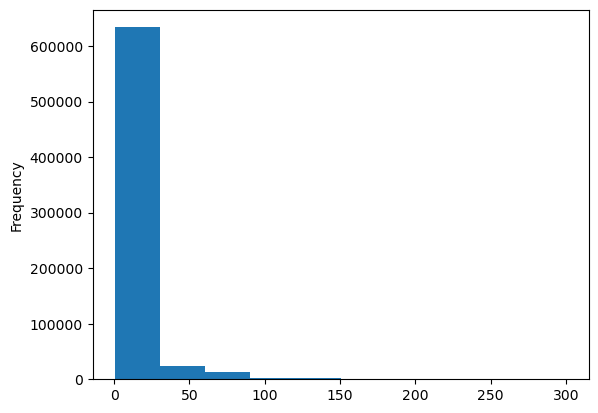

In [19]:

ax = df_all.price.plot.hist()